# Project: Analyze players abilities in FIFA 15
By: odubajo abdul qoyyum
## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#sources">Data Sources</a></li>
    <li><a href="#questions">Posing Questions</a></li>
    <li><a href="#wrangling">Data Assessing</a></li>
    <li><a href="#cleaning">Data Cleaning</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Summary and Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project will examine the FIFA dataset. To be more specific, it will take a closer look at the player abilities in the football world as scored by FIFA. It will also take a look at the development of the abilities common to nations and clubs. Also, individual abilities would be scored according to some self- developed metric

<a id='sources'></a>
## Data Source


> **Name:** FIFA data</li>
><ul>   
>    <li><b>Source:</b>kaggle</li>    
>    <li><b>Method of gathering:</b> Manual download</li>
></ul>


<a id='sources'></a>
## Posing Questions


 **Name:** FIFA data</li>
><ul>   
>    <li><b>Question 1: which countries were the tallest players from?:</b></li>    
>    <li><b>Question 2: who were  the top finishers?:</b></li>
>    <li><b>Question 3: who were the lethal finishers in the EPL?:</b></li>        
>    <li><b>Question 4: which country had more variety of decent finishers?:</b></li>        
>    <li><b>Question 5: who were the best defensive midfielders?:</b></li>        
>    <li><b>Question 6: who were the best slide tacklers?:</b></li>        
>    <li><b>Question 7: which goalkeepers had  the best reflexes?:</b></li>    
>    <li><b>Question 8: which country had  the most 5 star skillers?:</b></li>       
>    <li><b>Question 9: which country had more players with pace?:</b></li>        
>    <li><b>Question 10: which players were the best dribblers?:</b></li>        
>    <li><b>Question 11: were the best dribblers necessarily fast?:</b></li>     
>    <li><b>Question 12: who were the top rated players with a 5 star weak foot rating?:</b></li>        
>    <li><b>Question 13: who were the top freekick specialists?:</b></li>         
>    <li><b>Question 14: who were the best players wearing the NO 10 jersey?:</b></li>        
>    <li><b>Question 15: who were the  players posing the most aerial threat?:</b></li>     
>    <li><b>Question 16: which player had the best positioning?:</b></li>      
></ul>


### Import all packages and set plots to be embedded inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

%matplotlib inline

### DATA ASSESSING

In [2]:
#read data and look at random samples
df_fifa = pd.read_csv('players_15.csv')
df_fifa.sample(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6385,197031,https://sofifa.com/player/197031/marvin-ducksc...,M. Ducksch,Marvin Ducksch,20,1994-03-07,188,75,Germany,SC Paderborn 07,...,45+0,46+0,46+0,46+0,45+0,42+0,42+0,42+0,42+0,42+0
5075,213751,https://sofifa.com/player/213751/joao-diogo-se...,João Meira,João Diogo Serpa Meira,27,1987-04-30,185,78,Portugal,Os Belenenses,...,58+0,60+0,60+0,60+0,58+0,63+0,67+0,67+0,67+0,63+0
15776,219216,https://sofifa.com/player/219216/josh-windass/...,J. Windass,Josh Windass,20,1994-01-09,175,68,England,Accrington Stanley,...,45+0,44+0,44+0,44+0,45+0,40+0,37+0,37+0,37+0,40+0
4820,185422,https://sofifa.com/player/185422/joshua-king/1...,J. King,Joshua King,22,1992-01-15,180,74,Norway,Blackburn Rovers,...,52+0,48+0,48+0,48+0,52+0,46+0,40+0,40+0,40+0,46+0
11591,195436,https://sofifa.com/player/195436/christopher-o...,C. Oualembo,Christopher Oualembo,27,1987-01-31,178,70,DR Congo,Associação Académica de Coimbra,...,61+0,58+0,58+0,58+0,61+0,60+0,60+0,60+0,60+0,60+0
1221,201138,https://sofifa.com/player/201138/zacharie-bouc...,Z. Boucher,Zacharie Boucher,22,1992-03-07,181,78,France,Toulouse Football Club,...,33+0,34+0,34+0,34+0,33+0,33+0,36+0,36+0,36+0,33+0
9355,204526,https://sofifa.com/player/204526/pablo-hervias...,Hervías,Pablo Hervías Rubio,21,1993-03-08,174,68,Spain,Real Sociedad,...,52+0,49+0,49+0,49+0,52+0,47+0,40+0,40+0,40+0,47+0
7897,184423,https://sofifa.com/player/184423/raphael-lecom...,R. Lecomte,Raphaël Lecomte,26,1988-05-22,179,77,France,KVC Westerlo,...,50+0,52+0,52+0,52+0,50+0,47+0,43+0,43+0,43+0,47+0
8518,214956,https://sofifa.com/player/214956/fabian-monser...,F. Monserrat,Fabián Ariel Monserrat,22,1992-06-25,169,64,Argentina,Independiente,...,53+0,51+0,51+0,51+0,53+0,48+0,43+0,43+0,43+0,48+0
3093,180818,https://sofifa.com/player/180818/david-mcgoldr...,D. McGoldrick,David McGoldrick,26,1987-11-29,185,74,England,Ipswich Town,...,48+0,49+0,49+0,49+0,48+0,46+0,45+0,45+0,45+0,46+0


In [3]:
#show the info of the dataframe
df_fifa.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Data columns (total 106 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    sofifa_id                   16155 non-null  int64  
 1    player_url                  16155 non-null  object 
 2    short_name                  16155 non-null  object 
 3    long_name                   16155 non-null  object 
 4    age                         16155 non-null  int64  
 5    dob                         16155 non-null  object 
 6    height_cm                   16155 non-null  int64  
 7    weight_kg                   16155 non-null  int64  
 8    nationality                 16155 non-null  object 
 9    club_name                   15916 non-null  object 
 10   league_name                 15916 non-null  object 
 11   league_rank                 15916 non-null  float64
 12   overall                     16155 non-null  int64  
 13   potential     

- some data types need changing

<AxesSubplot:>

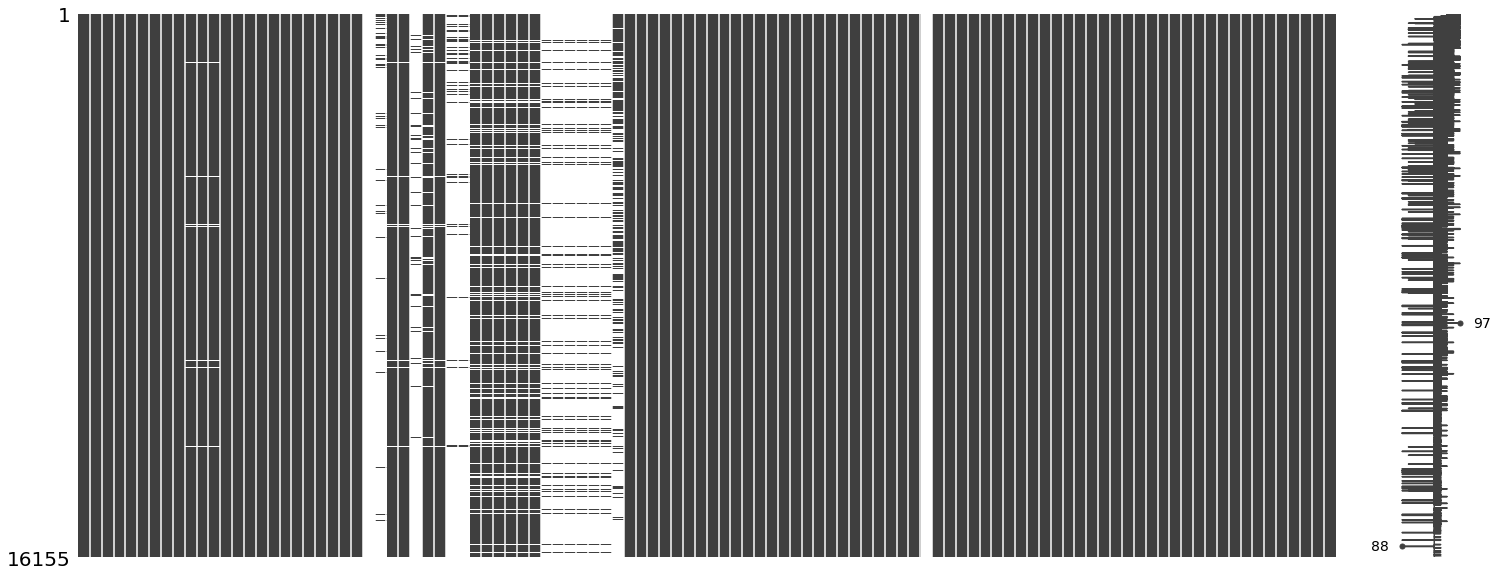

In [4]:
#checking for missing values

ms.matrix(df_fifa)

- there is missing data across some of the columns

In [5]:
#looking for duplicate players 

df_fifa[df_fifa['long_name'].duplicated(keep='first')]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4445,116917,https://sofifa.com/player/116917/damien-perqui...,D. Perquis,Damien Perquis,28,1986-03-08,184,82,France,Stade Malherbe Caen,...,31+0,33+0,33+0,33+0,31+0,31+0,32+0,32+0,32+0,31+0
6176,157983,https://sofifa.com/player/157983/tommy-smith/1...,T. Smith,Tommy Smith,34,1980-05-22,179,80,England,Brentford,...,53+0,54+0,54+0,54+0,53+0,48+0,47+0,47+0,47+0,48+0
6182,159490,https://sofifa.com/player/159490/paul-robinson...,P. Robinson,Paul Robinson,35,1978-12-14,175,73,England,Birmingham City,...,59+0,61+0,61+0,61+0,59+0,62+0,66+0,66+0,66+0,62+0
6252,177485,https://sofifa.com/player/177485/mamadou-samas...,M. Samassa,Mamadou Samassa,28,1986-05-01,188,84,Mali,Stade Brestois 29,...,42+0,43+0,43+0,43+0,42+0,41+0,43+0,43+0,43+0,41+0
6661,214480,https://sofifa.com/player/214480/javier-lopez/...,J. López,Javier López Rodríguez,25,1988-10-30,192,81,Colombia,Rionegro Águilas,...,54+0,56+0,56+0,56+0,54+0,59+0,65+0,65+0,65+0,59+0
7056,151213,https://sofifa.com/player/151213/ben-davies/15...,B. Davies,Ben Davies,33,1981-05-27,170,67,England,Sheffield United,...,63+0,62+0,62+0,62+0,63+0,61+0,60+0,60+0,60+0,61+0
7103,163584,https://sofifa.com/player/163584/paul-robinson...,P. Robinson,Paul Robinson,32,1982-01-07,185,74,England,Portsmouth,...,55+0,61+0,61+0,61+0,55+0,60+0,65+0,65+0,65+0,60+0
7200,188200,https://sofifa.com/player/188200/matt-taylor/1...,M. Taylor,Matthew Taylor,32,1982-01-30,180,70,England,Cheltenham Town,...,54+0,57+0,57+0,57+0,54+0,60+0,65+0,65+0,65+0,60+0
7475,194018,https://sofifa.com/player/194018/james-collins...,J. Collins,James Collins,23,1990-12-01,188,86,Republic of Ireland,Shrewsbury,...,44+0,44+0,44+0,44+0,44+0,44+0,44+0,44+0,44+0,44+0
7745,203783,https://sofifa.com/player/203783/tommy-smith/1...,T. Smith,Tommy Smith,22,1992-04-14,185,75,England,Huddersfield Town,...,62+0,61+0,61+0,61+0,62+0,63+0,64+0,64+0,64+0,63+0


- It is rare but some players do have the same names but are entirely different people so we won’t be dropping this column

## DATA CLEANING

In [6]:
#dropping some of the colums we're not interested in among other reasons

df_fifa.drop(['player_url','body_type','dob','potential','work_rate','real_face','team_position','player_tags','loaned_from','loaned_from',
            'contract_valid_until','nation_jersey_number','player_traits','defending_marking','gk_kicking','gk_reflexes',
             'nation_position','joined','release_clause_eur','ls', 'st', 'rs','gk_diving','gk_speed','gk_positioning',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm','mentality_composure',
       'rcm', 'rm','lcb', 'cb','rcb','gk_handling'], axis=1,inplace=True)

#### dealing with columns with missing values

In [7]:
#checking columns with missing values

df_fifa.columns[df_fifa.isnull().any()]

Index(['club_name', 'league_name', 'league_rank', 'team_jersey_number', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic'],
      dtype='object')

In [8]:
# let us drop missing values in ('club_name', 'league_name','league_rank','team_jersey_number')

df_fifa.dropna(subset=['club_name', 'league_name','league_rank','team_jersey_number'],inplace=True)

In [9]:
# checking the rows with missing dribbling data

df_fifa[df_fifa['dribbling'].isnull()]

,sofifa_id,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,...,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,lwb,ldm,cdm,rdm,rwb,lb,rb
4,167495,M. Neuer,Manuel Neuer,28,193,92,Germany,FC Bayern München,German 1. Bundesliga,1.0,...,92,90,86,36+3,40+3,40+3,40+3,36+3,36+3,36+3
21,192119,T. Courtois,Thibaut Courtois,22,199,88,Belgium,Chelsea,English Premier League,1.0,...,69,86,88,33+1,34+1,34+1,34+1,33+1,32+1,32+1
39,167948,H. Lloris,Hugo Lloris,27,188,78,France,Tottenham Hotspur,English Premier League,1.0,...,71,81,88,35+1,35+1,35+1,35+1,35+1,34+1,34+1
43,48940,P. Čech,Petr Čech,32,196,90,Czech Republic,Chelsea,English Premier League,1.0,...,73,83,84,34+2,36+2,36+2,36+2,34+2,33+2,33+2
53,168435,S. Sirigu,Salvatore Sirigu,27,192,80,Italy,Paris Saint-Germain,French Ligue 1,1.0,...,73,84,87,31+1,33+1,33+1,33+1,31+1,31+1,31+1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,224829,H. Reynolds,Harry Reynolds,18,178,73,England,Cheltenham Town,English League Two,4.0,...,40,38,52,27+0,26+0,26+0,26+0,27+0,26+0,26+0
16144,194372,M. Taşkıran,Mahmut Ertuğrul Taşkıran,24,191,83,Turkey,Sivasspor,Turkish Süper Lig,1.0,...,53,44,41,26+0,25+0,25+0,25+0,26+0,25+0,25+0
16145,11728,B. Richardson,Barry Richardson,44,185,77,England,Wycombe Wanderers,English League Two,4.0,...,21,57,31,27+0,28+0,28+0,28+0,27+0,27+0,27+0
16147,220939,L. Pilling,Luke Pilling,16,180,69,Wales,Tranmere Rovers,English League Two,4.0,...,41,42,45,28+0,28+0,28+0,28+0,28+0,28+0,28+0


In [10]:
# checking the rows with missing pace data

df_fifa[df_fifa['pace'].isnull()].player_positions

4        GK
21       GK
39       GK
43       GK
53       GK
         ..
16141    GK
16144    GK
16145    GK
16147    GK
16149    GK
Name: player_positions, Length: 1738, dtype: object

In [11]:
#checking the number of goalkeepers we have 

df_fifa[df_fifa['player_positions'].isin(['GK'])].shape

(1738, 64)

- we can tell the missing values are goalkeeper abilities

In [12]:
#replacing na values with zero

df_fifa=df_fifa.fillna(0)#

In [13]:
#checking if we still have missing values

df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15916 entries, 0 to 16154
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   15916 non-null  int64  
 1   short_name                  15916 non-null  object 
 2   long_name                   15916 non-null  object 
 3   age                         15916 non-null  int64  
 4   height_cm                   15916 non-null  int64  
 5   weight_kg                   15916 non-null  int64  
 6   nationality                 15916 non-null  object 
 7   club_name                   15916 non-null  object 
 8   league_name                 15916 non-null  object 
 9   league_rank                 15916 non-null  float64
 10  overall                     15916 non-null  int64  
 11  value_eur                   15916 non-null  int64  
 12  wage_eur                    15916 non-null  int64  
 13  player_positions            159

> the rows missing the following data which are:('pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic) are goalkeepers so the nan values were replaced with zero
       
> also the missing goalkeeping columns contain outfield players’ data so the nan values were replaced with zero


In [14]:
#splitting the conents of the following columns 

for i in df_fifa[['lb','rb','lwb','cdm','rwb']]:
         df_fifa[i]=df_fifa[i].str[:2]

In [15]:
#converting it to an int datatype

for i in df_fifa[['lb','rb','lwb','cdm','rwb']]:
         df_fifa[i]=df_fifa[i].astype(np.int64)

In [16]:
#storing the cleaned data

df_fifa.to_csv('cleaned_fifa_15.csv')

## Exploratory Data Analysis

### Question 1: which countries were the tallest players from?

In [17]:
# grouping the dataset by country and checking the mean height

df_fifa.groupby('nationality')['height_cm'].mean().sort_values(ascending=False).head(10)

nationality
Kyrgyzstan        194.000000
Oman              194.000000
India             194.000000
Lebanon           187.333333
Hungary           186.730769
Ukraine           186.142857
Guyana            186.000000
Lithuania         185.875000
Moldova           185.714286
Czech Republic    185.538462
Name: height_cm, dtype: float64

In [18]:
#assigning a variable to the mean of the countries value

df_tallest=df_fifa.groupby('nationality')['height_cm'].mean().sort_values(ascending=False).head(10)

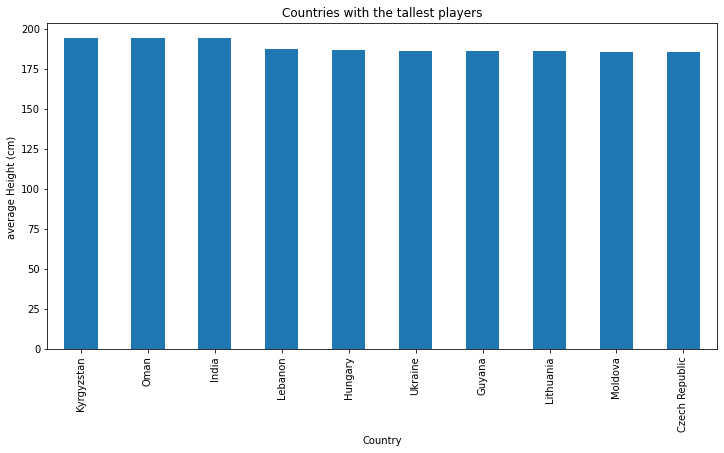

In [19]:
#creating a bar chart to visualize the results

plt.figure(figsize=[12, 6])
df_tallest.plot(kind='bar')

# Labeling the axes
plt.xlabel('Country')
plt.ylabel('average Height (cm) ')
plt.title('Countries with the tallest players')

# Dsiplay the plot
plt.show()

### Question 2: who were  the top finishers?

In [20]:
#creating a sub dataframe containing postion, name and finishing ability

df_finish=df_fifa[['short_name','attacking_finishing','player_positions','club_name','age']]

In [21]:
#sorting the sub dataframe by finishing ability

df_finish.sort_values(by='attacking_finishing',ascending=False).head(15)

,short_name,attacking_finishing,player_positions,club_name,age
1,Cristiano Ronaldo,95,"LW, LM",Real Madrid,29
0,L. Messi,94,CF,FC Barcelona,27
3,Z. Ibrahimović,91,ST,Paris Saint-Germain,32
5,L. Suárez,91,"ST, CF",FC Barcelona,27
8,R. van Persie,91,ST,Manchester United,30
11,Falcao,91,ST,Manchester United,28
37,Diego Costa,90,ST,Chelsea,25
52,G. Higuaín,89,ST,Napoli,26
26,S. Agüero,89,ST,Manchester City,26
25,T. Müller,88,"RM, CAM, ST, LM",FC Bayern München,24


- the best finishers occupy the `CF` and `ST` positions


- Thomas muller really does play all offensive minded positions

### Question 3: who were the lethal finishers in the EPL?

> we will be assuming any player with a finishing rating of more than `85` is lethal


In [22]:
#creating a filter for finishers above 85 rating and only `EPL` teams

lethal_filt=(df_fifa['attacking_finishing']>=86) & (df_fifa['league_name'] == 'English Premier League')

#making a sub dataframe based on the filter and club name

df_epl_finish=df_fifa[lethal_filt]

In [23]:
df_epl_finish[['short_name','attacking_finishing','player_positions','club_name','age'
              ]].sort_values(by='attacking_finishing',ascending=False)

,short_name,attacking_finishing,player_positions,club_name,age
8,R. van Persie,91,ST,Manchester United,30
11,Falcao,91,ST,Manchester United,28
37,Diego Costa,90,ST,Chelsea,25
26,S. Agüero,89,ST,Manchester City,26
634,L. Podolski,87,"LM, LW, ST",Arsenal,29
30,W. Rooney,86,"ST, CF, CAM",Manchester United,28


- `rvp` and `falcao` are tied for the best finishing followed by `diego costa` then `kun aguero`

### Question 4: which country had more variety of decent finishers?

- we will go with a treshold of `80` and more has a characteristic of a decent finisher

In [24]:
#creating a filter for finishers above 79 rating

decent_filt=df_fifa['attacking_finishing']>=80

#making a sub dataframe based on the filter and country

df_decent_finish=df_fifa[decent_filt]

In [25]:
#sorting the sub dataframe by finishing ability

df_nation_finish=df_decent_finish.groupby('nationality')['attacking_finishing'].count().sort_values(ascending=False).head(5)


In [26]:
df_nation_finish

nationality
Spain        16
Germany      11
Italy        10
France       10
Argentina     9
Name: attacking_finishing, dtype: int64

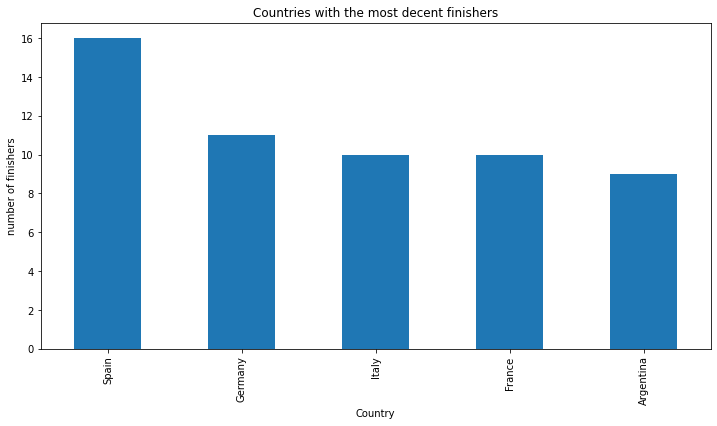

In [27]:
#ceating a bar chart to visualize the results

plt.figure(figsize=[12, 6])
df_nation_finish.plot.bar()

# Labeling the axes
plt.xlabel('Country')
plt.ylabel('number of finishers')
plt.title('Countries with the most decent finishers')

# Dsiplay the plot
plt.show()

> spain has a wide spectrum of decent finishers on the team

### Question 5: who were the best defensive midfielders?

In [28]:
#creating a sub dataframe containing postion, name and defensive midfield capability

df_dm=df_fifa[['short_name', 'overall','cdm','player_positions','club_name']]

In [29]:
#sorting the sub dataframe by defensive midfield capability

df_dm.sort_values(by='cdm',ascending=False).head(20)

,short_name,overall,cdm,player_positions,club_name
14,P. Lahm,87,85,"CDM, RB, CM",FC Bayern München
29,Y. Touré,86,84,"CM, CDM",Manchester City
9,B. Schweinsteiger,88,84,"CM, CDM",FC Bayern München
38,A. Vidal,85,83,"CM, CDM",Juventus
51,S. Khedira,84,83,"CDM, CM",Real Madrid
33,Sergio Busquets,85,83,"CDM, CM",FC Barcelona
57,D. De Rossi,84,83,CDM,Roma
85,J. Mascherano,83,82,CB,FC Barcelona
111,N. Matić,82,82,"CDM, CM",Chelsea
40,Javi Martinez,85,82,"CB, CDM, CM",FC Bayern München


- there were not much highly rated traditional `DMS` during this time

### Question 6: who were the best slide tacklers?

In [30]:
#creating a sub dataframe containing postion, name and slide tackling ability

df_slide=df_fifa[['defending_sliding_tackle','short_name','player_positions']]

In [31]:
#sorting the sub dataframe by slide tackling ability

df_slide.sort_values(by='defending_sliding_tackle',ascending=False).head(10)

,defending_sliding_tackle,short_name,player_positions
14,95,P. Lahm,"CDM, RB, CM"
15,90,Sergio Ramos,CB
82,90,Pepe,"CB, CDM"
16,89,Thiago Silva,CB
38,89,A. Vidal,"CM, CDM"
127,88,Luiz Gustavo,CDM
40,88,Javi Martinez,"CB, CDM, CM"
63,87,D. Godín,CB
118,87,Sokratis,"CB, RB"
173,87,S. Bender,CDM


- lahm was the best slide tackler significantly

### Question 7: which goalkeepers had  the best reflexes?

> there seems to be a signicant difference between `goalkeeping reflex` and `reaction`

> `reaction` seems to be how quickly a player adjusts to the situation at hand be it repositioning himself or deciding to play sweeper keeper and decision making while `reflex` is responding to what's within the goalkeeper's surrounding



In [32]:
#creating a filter to show only goalkeepers

gk_filt=df_fifa['player_positions']=='GK'

#creating the sub dataframe using the filter

df_gk=df_fifa[gk_filt]

In [33]:
#creating a sub dataframe containing postion, name, goalkeeping reflexes and reaction

df_gk_sub=df_gk[['goalkeeping_reflexes','movement_reactions','short_name']]

In [34]:
#sorting the sub dataframe by reflexes

df_gk_sub.sort_values(by='goalkeeping_reflexes',ascending=False).head(10)

,goalkeeping_reflexes,movement_reactions,short_name
269,90,62,V. Enyeama
39,88,84,H. Lloris
21,88,76,T. Courtois
54,88,80,Casillas
67,88,78,De Gea
201,88,78,Diego Alves
150,87,84,F. Muslera
53,87,78,S. Sirigu
124,86,81,J. Hart
270,86,75,G. Ochoa


- `Enyeama` had the best reflex followed by `lloris`


- a lot of the keepers with exceptional reflex did not have a respective reaction ability to match

### Question 8: which country had  the most 5 star skillers?

In [35]:
#creating a filter for skilers above 4 rating

skill_filt =df_fifa['skill_moves']==5

#making a sub dataframe based on the filter

df_skill=df_fifa[skill_filt]

In [36]:
#creating a pivot table

five_skilled=pd.pivot_table(df_skill,index='nationality',values='skill_moves',aggfunc='count')

In [37]:
#sorting the table by number of players

five_skilled.sort_values(by='skill_moves',ascending=False)

,skill_moves
nationality,
Brazil,9
Morocco,3
Portugal,3
Ecuador,2
France,2
Chile,1
Colombia,1
Egypt,1
Netherlands,1


- `brazil` had the most 5 star skiils rated players

### Question 9: which country had  more players with pace?

In [38]:
#creating a filter for pace above 87 rating

filt_pace=(df_fifa['pace']>= 88)

#making a sub dataframe based on the filter

df_pace=df_fifa[filt_pace]

In [39]:
df_pace

,sofifa_id,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,...,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,lwb,ldm,cdm,rdm,rwb,lb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,169,67,Argentina,FC Barcelona,Spain Primera Division,1.0,...,15,14,8,62,62+3,62,62+3,62,54,54
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,185,80,Portugal,Real Madrid,Spain Primera Division,1.0,...,15,14,11,63,63+3,63,63+3,63,57,57
2,9014,A. Robben,Arjen Robben,30,180,80,Netherlands,FC Bayern München,German 1. Bundesliga,1.0,...,11,5,15,64,64+3,64,64+3,64,55,55
7,183277,E. Hazard,Eden Hazard,23,173,74,Belgium,Chelsea,English Premier League,1.0,...,6,8,8,62,64+2,64,64+2,62,54,54
10,156616,F. Ribéry,Franck Bilal Ribéry,31,170,72,France,FC Bayern München,German 1. Bundesliga,1.0,...,9,7,10,63,63+2,63,63+2,63,53,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13446,203877,D. Maatsen,Darren Maatsen,24,183,71,Netherlands,Ross County FC,Scottish Premiership,1.0,...,9,8,8,46,43+0,43,43+0,46,43,43
13496,188982,P. Rakotoharisoa,Pierrick Rakotoharisoa,23,174,60,France,Le Havre AC,French Ligue 2,2.0,...,14,12,9,47,44+0,44,44+0,47,41,41
13669,209214,M. Ali,Majed Ali,28,167,65,Saudi Arabia,Al Shoulla,Saudi Abdul L. Jameel League,1.0,...,13,5,12,58,55+0,55,55+0,58,57,57
13780,210786,S. Al Sawadi,Sultan Al Sawadi,21,168,60,Saudi Arabia,Al Ahli,Saudi Abdul L. Jameel League,1.0,...,14,7,7,43,40+0,40,40+0,43,38,38


In [40]:
#creating a pivot table and sorting it by pace

fast_pace=pd.pivot_table(df_pace,index='nationality',values='pace',aggfunc='count').sort_values(by='pace',
                                                                                                ascending=False).head(10)

fast_pace

,pace
nationality,
England,37
Colombia,24
Argentina,23
France,23
Spain,20
Netherlands,16
Brazil,15
Ghana,14
Chile,12


- `England` distinctively had more fast players than any other country

### Question 10: which players were the best dribblers?

In [41]:
#creating a sub dataframe containing postion, name and dribbling ability

df_dribble=df_fifa[['short_name','dribbling','player_positions','club_name','age']]

In [42]:
#sorting the sub dataframe by driblling ability

df_dribble.sort_values(by='dribbling',ascending=False).head(10)

,short_name,dribbling,player_positions,club_name,age
0,L. Messi,96.0,CF,FC Barcelona,27
10,F. Ribéry,92.0,LM,FC Bayern München,31
2,A. Robben,92.0,"RM, LM, RW",FC Bayern München,30
20,Neymar,92.0,LW,FC Barcelona,22
1,Cristiano Ronaldo,91.0,"LW, LM",Real Madrid,29
6,Iniesta,91.0,"CM, LW",FC Barcelona,30
7,E. Hazard,91.0,"LM, RM",Chelsea,23
32,M. Götze,89.0,"CAM, CF, CM, RM",FC Bayern München,22
17,David Silva,89.0,"LM, CAM",Manchester City,28
18,L. Modrić,89.0,"CM, CDM",Real Madrid,28


- we can see `messi` was the best dribbler followed by the `bayern duo`

### Question 11: were the best dribblers necessarily fast?

Text(0.5, 1.0, 'relationship between pace and dribbling')

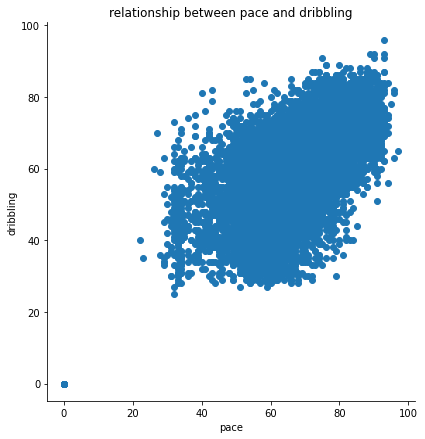

In [43]:
#creating a scatterplot to examine the general correlation betwen pace and dribbling

g = sns.FacetGrid(data = df_fifa, height = 6)
g.map(plt.scatter, 'pace', 'dribbling');
plt.title('relationship between pace and dribbling')

- we can see the faster the player the more his dribbling ability


- but we want to see this relationship among top dribblers so we will make a dataframe containing top dribblers


- we will assume any player with a dribbling ability above 88 is a top dribller

In [44]:
#creating a filter for dribbling above 88 rating

filt_dribble=df_fifa['dribbling']>= 89

#making a sub dataframe based on the filter 

df_dribble=df_fifa[filt_dribble]

df_dribble

,sofifa_id,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,...,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,lwb,ldm,cdm,rdm,rwb,lb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,169,67,Argentina,FC Barcelona,Spain Primera Division,1.0,...,15,14,8,62,62+3,62,62+3,62,54,54
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,185,80,Portugal,Real Madrid,Spain Primera Division,1.0,...,15,14,11,63,63+3,63,63+3,63,57,57
2,9014,A. Robben,Arjen Robben,30,180,80,Netherlands,FC Bayern München,German 1. Bundesliga,1.0,...,11,5,15,64,64+3,64,64+3,64,55,55
6,41,Iniesta,Andrés Iniesta Luján,30,170,65,Spain,FC Barcelona,Spain Primera Division,1.0,...,6,13,7,76,77+3,77,77+3,76,70,70
7,183277,E. Hazard,Eden Hazard,23,173,74,Belgium,Chelsea,English Premier League,1.0,...,6,8,8,62,64+2,64,64+2,62,54,54
10,156616,F. Ribéry,Franck Bilal Ribéry,31,170,72,France,FC Bayern München,German 1. Bundesliga,1.0,...,9,7,10,63,63+2,63,63+2,63,53,53
17,168542,David Silva,David Josué Jiménez Silva,28,170,67,Spain,Manchester City,English Premier League,1.0,...,13,9,13,63,64+2,64,64+2,63,54,54
18,177003,L. Modrić,Luka Modrić,28,174,65,Croatia,Real Madrid,Spain Primera Division,1.0,...,7,14,9,81,80+2,80,80+2,81,76,76
20,190871,Neymar,Neymar da Silva Santos Júnior,22,175,64,Brazil,FC Barcelona,Spain Primera Division,1.0,...,15,15,11,61,59+3,59,59+3,61,55,55
32,192318,M. Götze,Mario Götze,22,176,72,Germany,FC Bayern München,German 1. Bundesliga,1.0,...,12,6,10,63,65+1,65,65+1,63,55,55


In [45]:
#creating a sub dataframe

df_dribble_sub=df_dribble[['short_name','dribbling','pace','player_positions','club_name','age']]

In [46]:
df_dribble_sub.sort_values(by='pace',ascending=True)

,short_name,dribbling,pace,player_positions,club_name,age
6,Iniesta,91.0,75.0,"CM, LW",FC Barcelona,30
17,David Silva,89.0,76.0,"LM, CAM",Manchester City,28
18,L. Modrić,89.0,76.0,"CM, CDM",Real Madrid,28
32,M. Götze,89.0,80.0,"CAM, CF, CM, RM",FC Bayern München,22
10,F. Ribéry,92.0,89.0,LM,FC Bayern München,31
7,E. Hazard,91.0,90.0,"LM, RM",Chelsea,23
20,Neymar,92.0,90.0,LW,FC Barcelona,22
0,L. Messi,96.0,93.0,CF,FC Barcelona,27
1,Cristiano Ronaldo,91.0,93.0,"LW, LM",Real Madrid,29
2,A. Robben,92.0,93.0,"RM, LM, RW",FC Bayern München,30


- 40 percent of the top dribblers have a pace lower than `81`


- therefore pace was not a neccessity to be top dribbler

### Question 12: who were the top rated players with a 5 star weak foot rating?

In [47]:
#creating a filter 

filt_foot=df_fifa['weak_foot'] > 4

#creating a sub dataframe using the filter

df_foot=df_fifa[filt_foot]

In [48]:
# looking at the top 10 players

df_foot[['short_name','overall','weak_foot','club_name','age']].sort_values(by='overall',ascending = False).head(10)

,short_name,overall,weak_foot,club_name,age
20,Neymar,86,5,FC Barcelona,22
34,T. Kroos,85,5,Real Madrid,24
59,W. Sneijder,84,5,Galatasaray SK,30
60,Santi Cazorla,84,5,Arsenal,29
72,Pedro,83,5,FC Barcelona,26
101,C. Eriksen,82,5,Tottenham Hotspur,22
149,Hernanes,82,5,Inter,29
157,K. De Bruyne,81,5,VfL Wolfsburg,23
162,H. Mkhitaryan,81,5,Borussia Dortmund,25
266,David Villa,80,5,Melbourne City FC,32


- `neymar` was the top player with a 5 star weak foot followed by `kroos` , `sneijder` ...

### Question 13: who were the top freekick specialists?

In [49]:
df_fifa[['short_name','skill_fk_accuracy','player_positions','club_name',
         'age']].sort_values(by='skill_fk_accuracy',ascending = False).head(15)

,short_name,skill_fk_accuracy,player_positions,club_name,age
55,A. Pirlo,93,"CM, CDM",Juventus,35
0,L. Messi,90,CF,FC Barcelona,27
538,H. Çalhanoğlu,90,"CAM, LM, CF, CM",Bayer 04 Leverkusen,20
641,S. Salihović,90,"CM, CDM, LM, LB",TSG 1899 Hoffenheim,29
1101,J. Arango,90,LM,Club Tijuana,34
59,W. Sneijder,89,"CAM, CM, LM",Galatasaray SK,30
328,R. Elm,88,CDM,PFC CSKA Moscow,26
1774,F. Lodi,88,"CDM, CM",Parma,30
28,Xavi,87,CM,FC Barcelona,34
258,Ronaldinho,87,CAM,Querétaro,34


- `pirlo` was the best freekick taker with a `93` rating 


- `messi`,`calhanoglu`,`salihovic`, and `arango` were tied with a `90` rating

### Question 14: who were the best players wearing the NO 10 jersey?

In [50]:
#creating a filter for the no 10 jersey

filt_num=df_fifa['team_jersey_number'] == 10

#creating a dataframe using the filter

df_10= df_fifa[filt_num]

In [51]:
#orting the dataframe by oveall rating

df_10[['short_name','overall','club_name','age']].sort_values(by='overall',ascending = False).head(10)

,short_name,overall,club_name,age
0,L. Messi,93,FC Barcelona,27
3,Z. Ibrahimović,90,Paris Saint-Germain,32
2,A. Robben,90,FC Bayern München,30
7,E. Hazard,88,Chelsea,23
19,J. Rodríguez,86,Real Madrid,22
30,W. Rooney,86,Manchester United,28
44,C. Tévez,85,Juventus,30
46,A. Turan,84,Atlético Madrid,27
59,W. Sneijder,84,Galatasaray SK,30
97,E. Džeko,83,Manchester City,28


- these were the top players wearing the NO 10 jersey

### Question 15: who were the  players posing the most aerial threat?

In [52]:
df_fifa[['short_name','attacking_heading_accuracy','power_jumping',
         'club_name',]].sort_values(by='attacking_heading_accuracy',ascending = False).head(15)

,short_name,attacking_heading_accuracy,power_jumping,club_name
1382,T. Cahill,94,94,New York Red Bulls
11,Falcao,94,93,Manchester United
264,Aduriz,93,94,Athletic Club de Bilbao
1386,A. Madlung,92,55,Eintracht Frankfurt
281,Naldo,91,47,VfL Wolfsburg
98,M. Mandžukić,91,86,Atlético Madrid
22,M. Hummels,91,70,Borussia Dortmund
197,Llorente,91,72,Juventus
1757,I. de Camargo,90,90,Standard de Liège
760,B. Dost,90,60,VfL Wolfsburg


- Ronaldo not being among the top players is strange

### Question 16: which player had the best positioning?

In [53]:
df_fifa[['short_name','mentality_positioning',
         'club_name',]].sort_values(by='mentality_positioning',ascending = False).head(10)

,short_name,mentality_positioning,club_name
25,T. Müller,94,FC Bayern München
0,L. Messi,92,FC Barcelona
11,Falcao,92,Manchester United
1,Cristiano Ronaldo,91,Real Madrid
8,R. van Persie,90,Manchester United
2,A. Robben,89,FC Bayern München
139,M. Gomez,88,Fiorentina
61,K. Huntelaar,88,FC Schalke 04
5,L. Suárez,88,FC Barcelona
174,J. Hernández,87,Real Madrid


- `muller` is the player with the best positioning

<a id='conclusions'></a>
## Summary and Conclusions

><ol>
>    <li><p>We can observe that there were not much traditional `DMS` during this time</p></li>     
>    <li><p> ronaldo was not among top 30 aerial threat</p></li>     
>    <li><p>pace was not a neccessity to be top dribbler</p></li> 
>    <li><p>`brazil` had the most 5 star skiils rated players</p></li> 
></ol>